In [1]:
import edge_detection as ed
import matplotlib.pyplot as plt
import numpy as np

In [21]:
image = plt.imread('99370264_p0.png')

print(ed.rgb_to_gray(image))
# # Sample Guassian Blur Usage
# kernel_size = 5
# sigma = 1.0
# gray_image = ed.rgb_to_gray(image)

# blurred_image = ed.gaussian_blur(gray_image, kernel_size, sigma)

# plt.figure(dpi = 300)
# plt.subplot(121), plt.imshow(image), plt.title('Original Image')
# plt.subplot(122), plt.imshow(blurred_image, cmap = "gray"), plt.title('Blurred Image')
# plt.show()

[[ 75  67  73 ... 208 206 202]
 [ 59  63  68 ... 212 211 210]
 [ 60  64  68 ... 211 210 208]
 ...
 [231 239 240 ...  16  15  15]
 [231 239 237 ...  15  16  17]
 [230 237 237 ...  15  17  17]]


165376


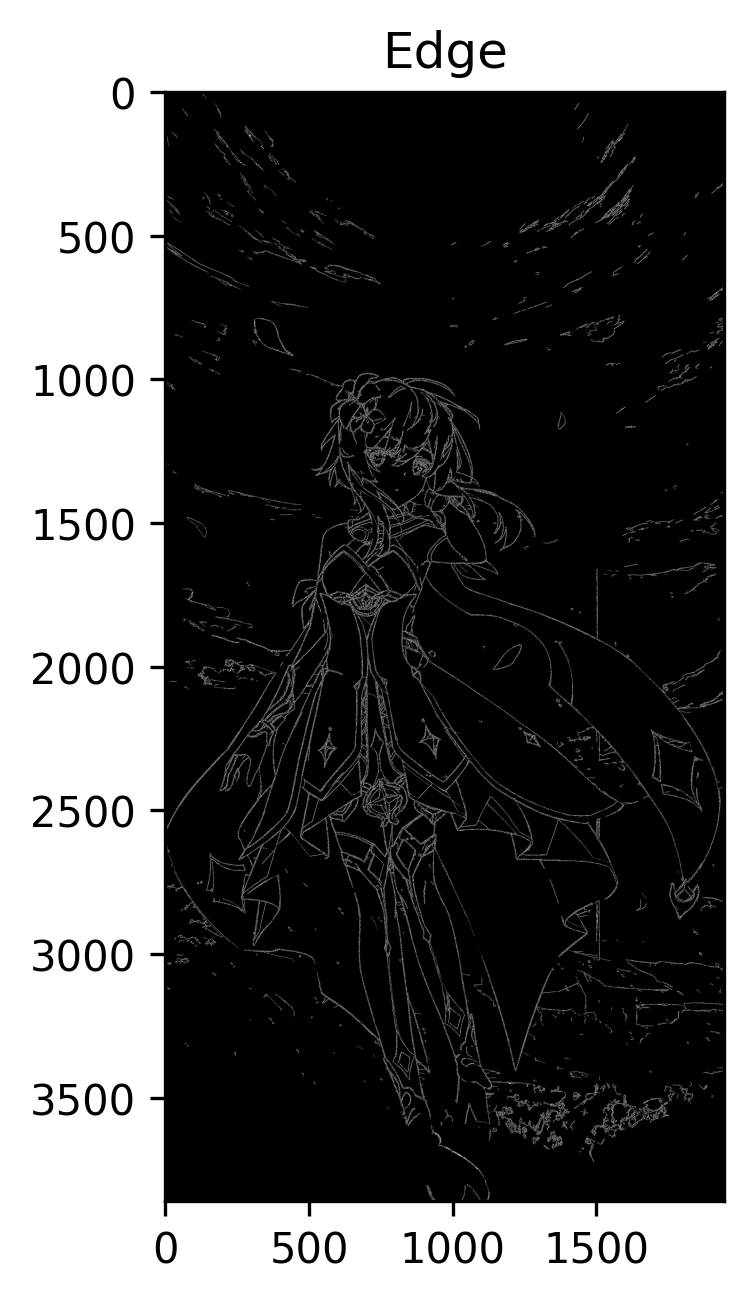

In [20]:
my_edges = ed.edge_detect(image, dev_kernel_size = 9, lower_threshold = 5, upper_threshold = 12, dev_sigma = 0.4)
print(np.sum(my_edges == 255))
plt.figure(dpi = 300)
plt.imshow(my_edges, cmap = "gray"), plt.title("Edge")
plt.show()

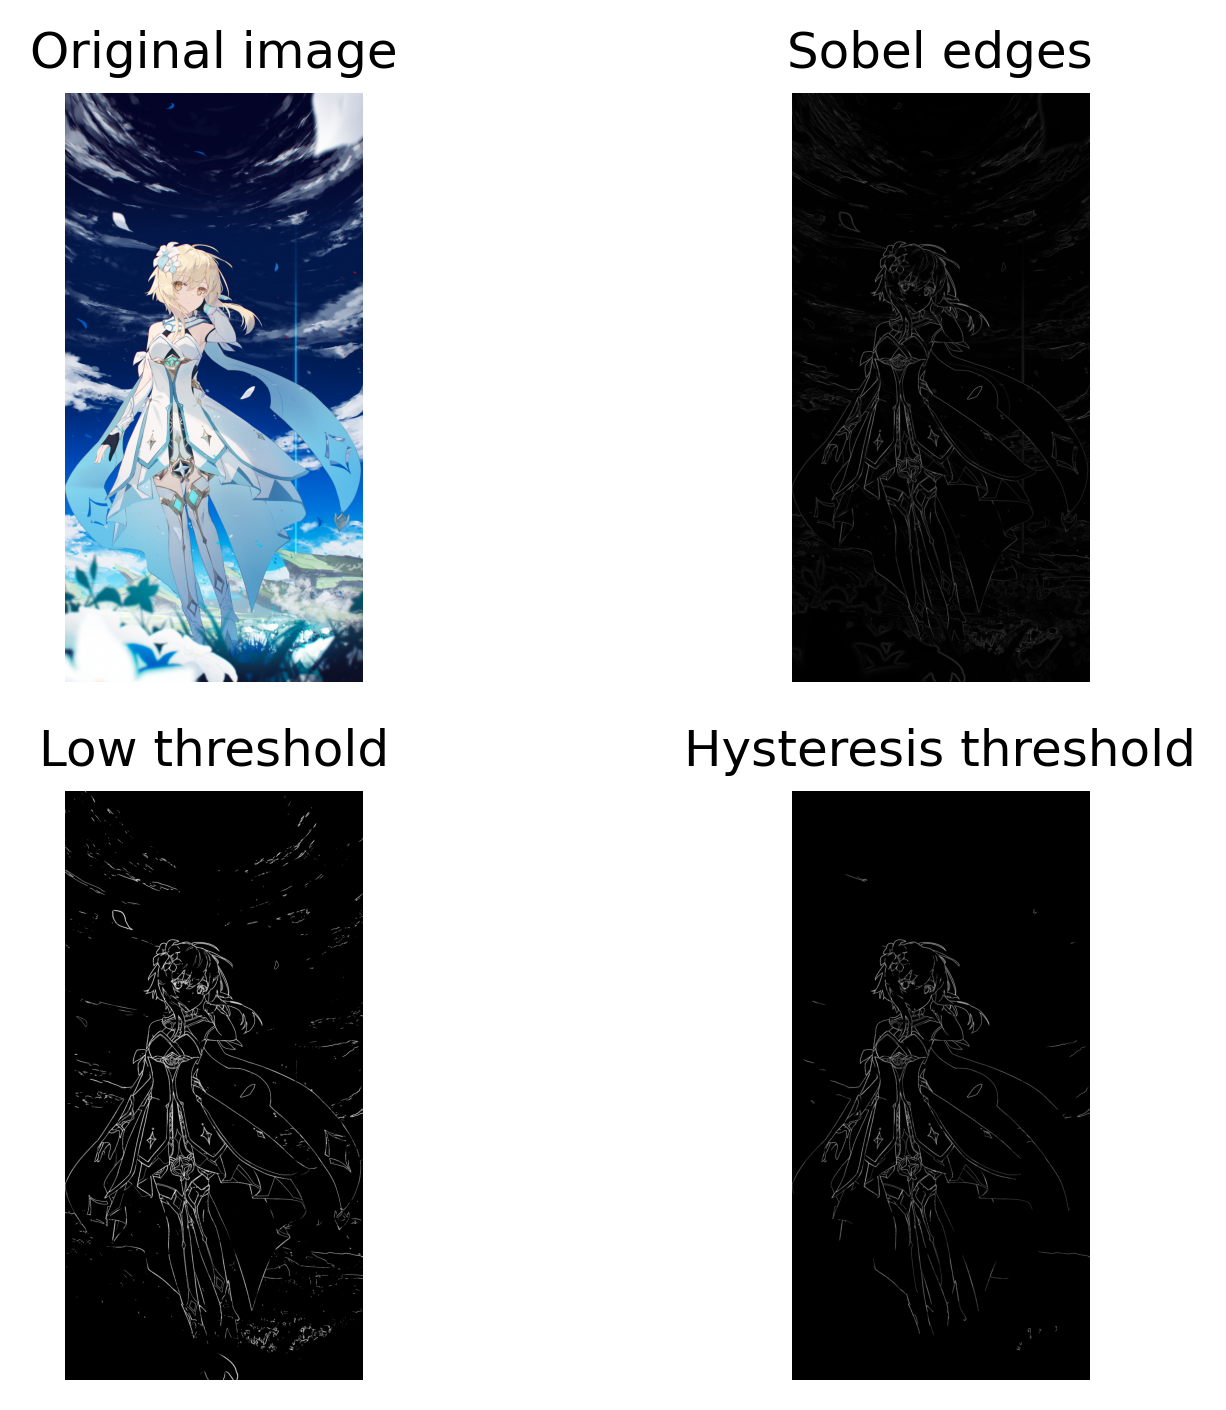

In [4]:
import matplotlib.pyplot as plt
from skimage import data, filters

fig, ax = plt.subplots(nrows=2, ncols=2, dpi = 300)

sedges = filters.sobel(ed.rgb_to_gray(image))

low = 0.1
high = 0.35

lowt = (sedges > low).astype(int)
hight = (sedges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(sedges, low, high)

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(sedges, cmap='gray')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='gray')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight + hyst, cmap='gray')
ax[1, 1].set_title('Hysteresis threshold')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()

173928


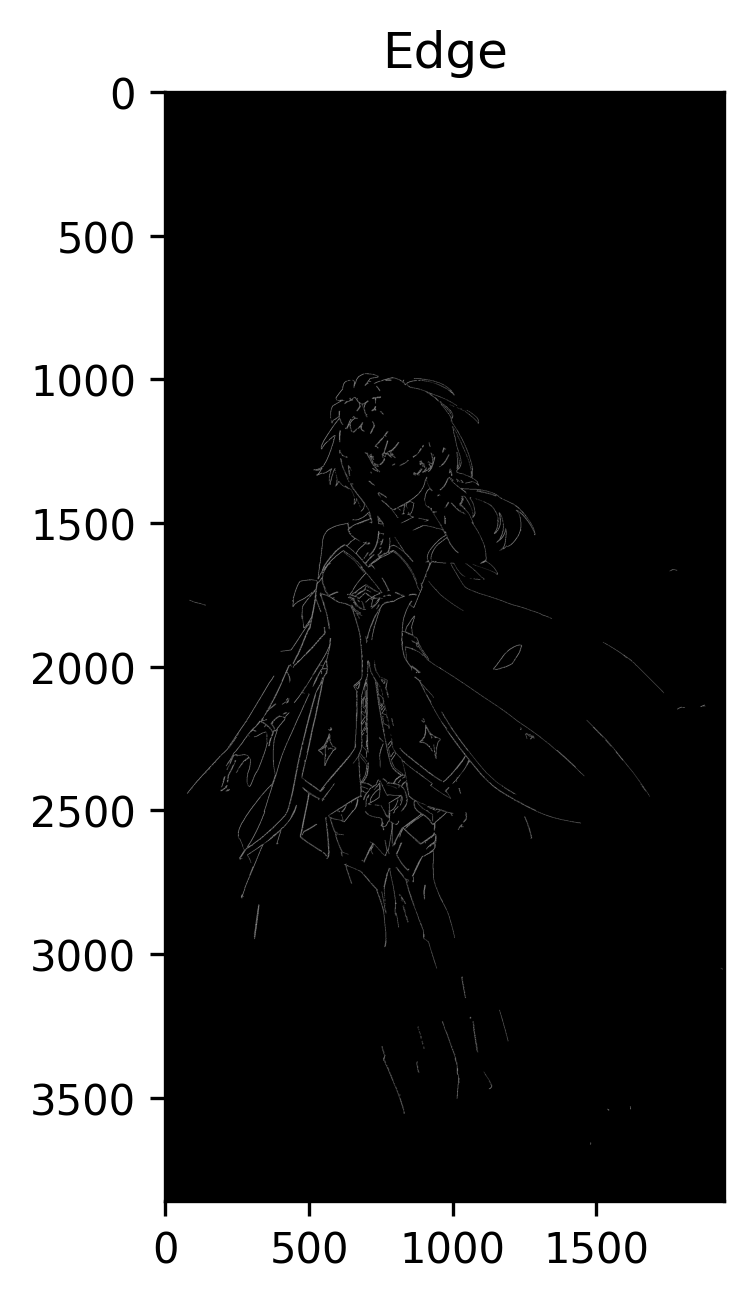

In [5]:
print(np.sum(hyst == 1))
plt.figure(dpi = 300)
plt.imshow(filters.apply_hysteresis_threshold(my_edges, 5, 10), cmap = "gray"), plt.title("Edge")
plt.show()

In [6]:
# image_red_channel = image[..., 0]

# # 生成一维高斯差分滤波器
# sigma = 1.0
# size = 5
# gaussian_derivative_kernel = ed.gaussian_derivative_kernel(size, sigma, order=1)

# print(gaussian_derivative_kernel)

# # 在图像上应用高斯差分滤波器
# gradient_x, gradient_y = ed.apply_gradient_operator(gray_image, gaussian_derivative_kernel)

# plt.figure(dpi = 300)
# plt.subplot(121), plt.imshow(gradient_x, cmap = "gray"), plt.title("Gradient of X")
# plt.subplot(122), plt.imshow(gradient_y, cmap = "gray"), plt.title("Gradient of Y")
# plt.show()

In [7]:
# angle_image = ed.calculate_angle_image(gradient_x, gradient_y)

# plt.figure(dpi = 300)
# plt.subplot(121), plt.imshow(image), plt.title('Original Image')
# plt.subplot(122), plt.imshow(angle_image, cmap = "gray"), plt.title('Angle Image')
# plt.show()

In [8]:
# print(angle_image)

In [9]:
# nms_image = ed.non_max_suppression(gradient_x, gradient_y)

# plt.figure(dpi = 300)
# plt.subplot(121), plt.imshow(image), plt.title('Original Image')
# plt.subplot(122), plt.imshow(nms_image, cmap = "gray"), plt.title('NMS Image')
# plt.show()

In [10]:
# print(np.sum(nms_image == 0))

In [11]:
# thin_image = ed.thinning_double_threshold(nms_image, 10, 13)

# plt.figure(dpi = 300)
# plt.subplot(121), plt.imshow(image), plt.title('Original Image')
# plt.subplot(122), plt.imshow(thin_image, cmap = "gray"), plt.title('Thinned Image')
# plt.show()

In [12]:
# print(thin_image.size, np.sum(thin_image == 255), np.sum(thin_image == 0))

In [13]:
import cv2

libpng warning: iCCP: known incorrect sRGB profile


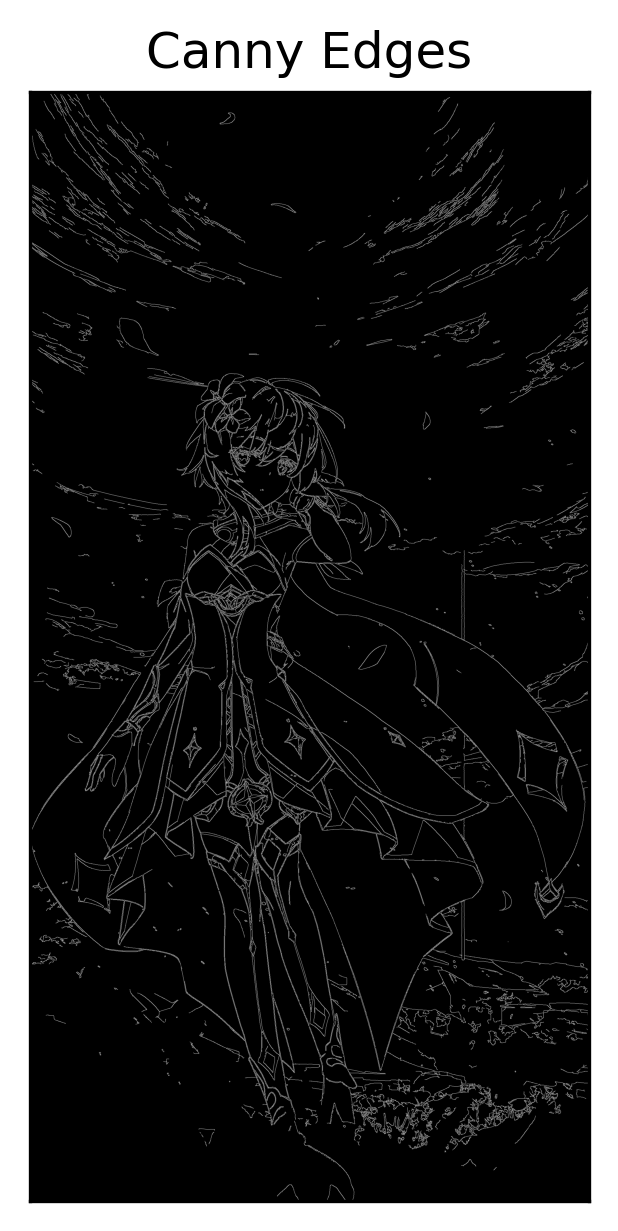

In [14]:
cv_image = cv2.imread('99370264_p0.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(cv_image, 50, 150)
# edges = ed.edge_detect(cv_image, is_gray = True)

# 显示原始图像和边缘检测结果
plt.figure(dpi = 300)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges'), plt.xticks([]), plt.yticks([])

plt.show()

In [15]:
print(np.max(edges))
print(edges.size, np.sum(edges == 255), np.sum(edges == 0))

255
7507700 210229 7297471


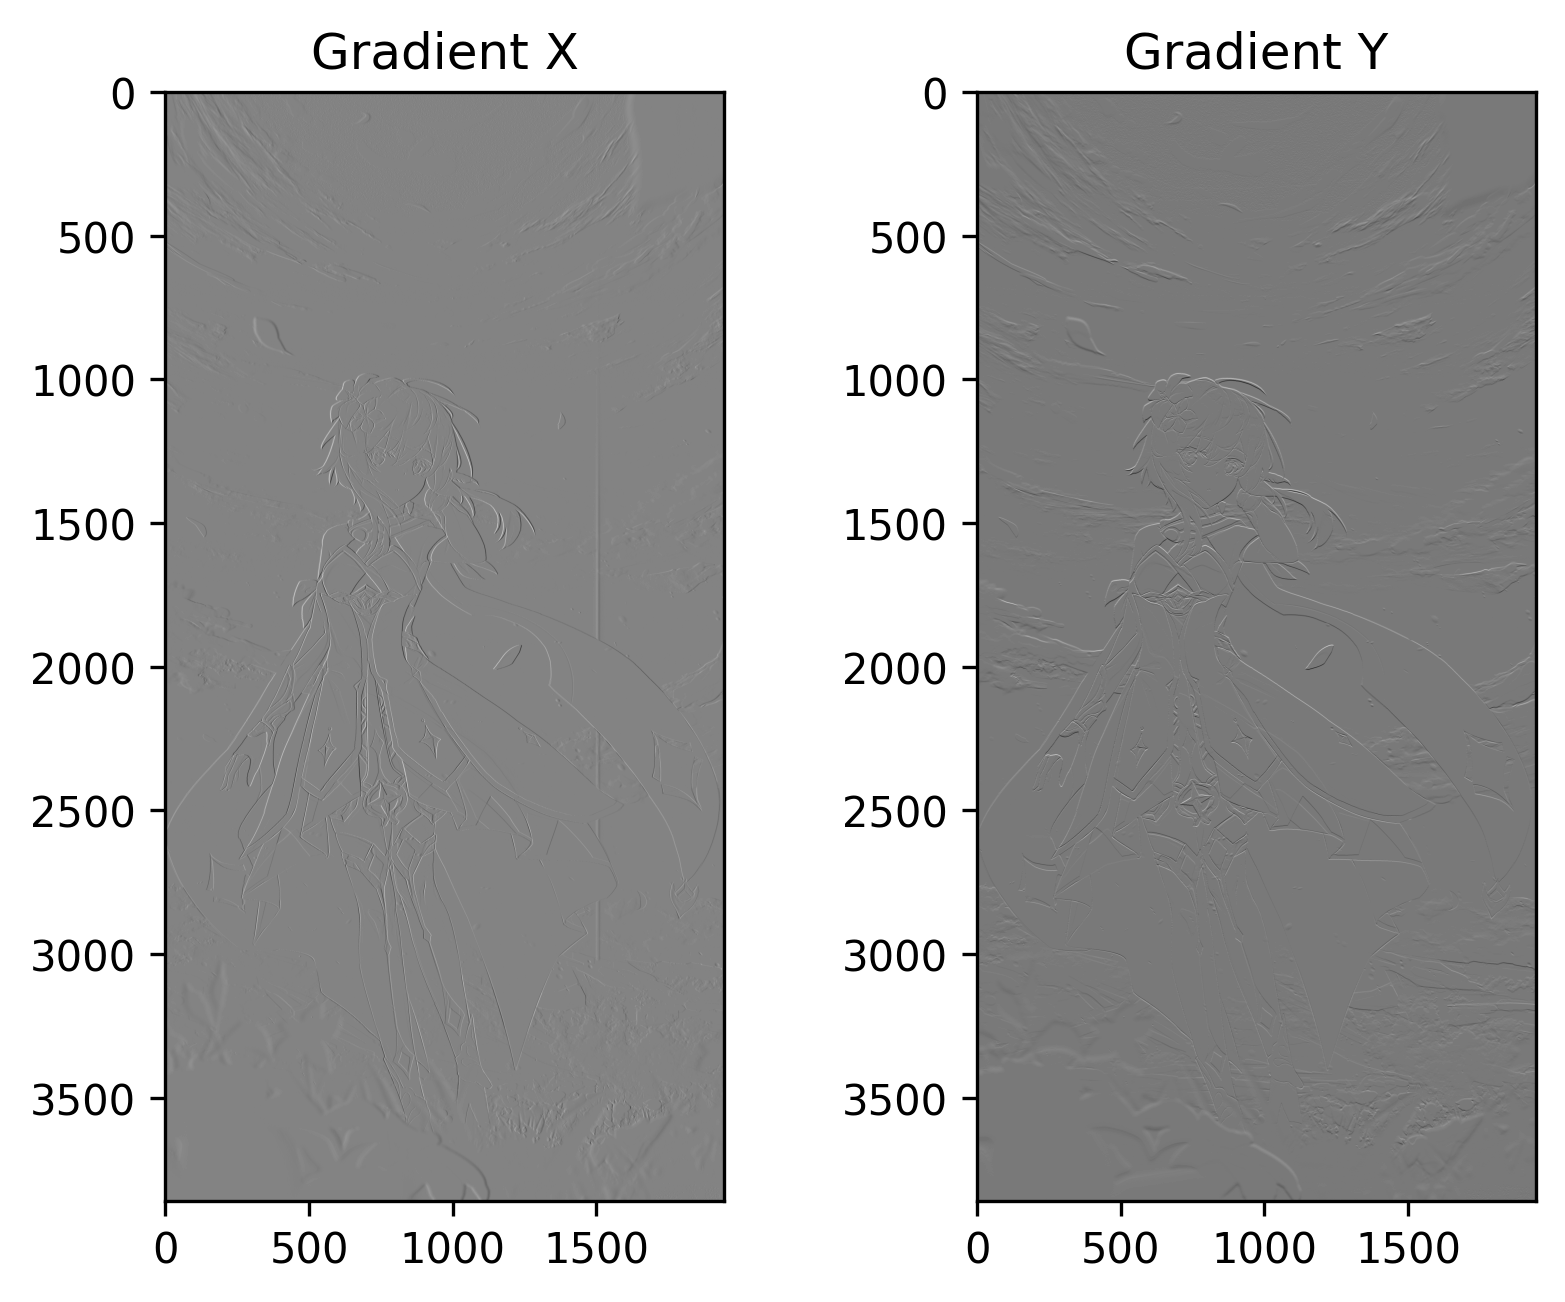

In [16]:
gradient_x = cv2.Sobel(cv_image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(cv_image, cv2.CV_64F, 0, 1, ksize=3)

plt.figure(dpi = 300)
plt.subplot(121), plt.imshow(gradient_x, cmap = "gray"), plt.title('Gradient X')
plt.subplot(122), plt.imshow(gradient_y, cmap = "gray"), plt.title('Gradient Y')
plt.show()

968.0433874574011


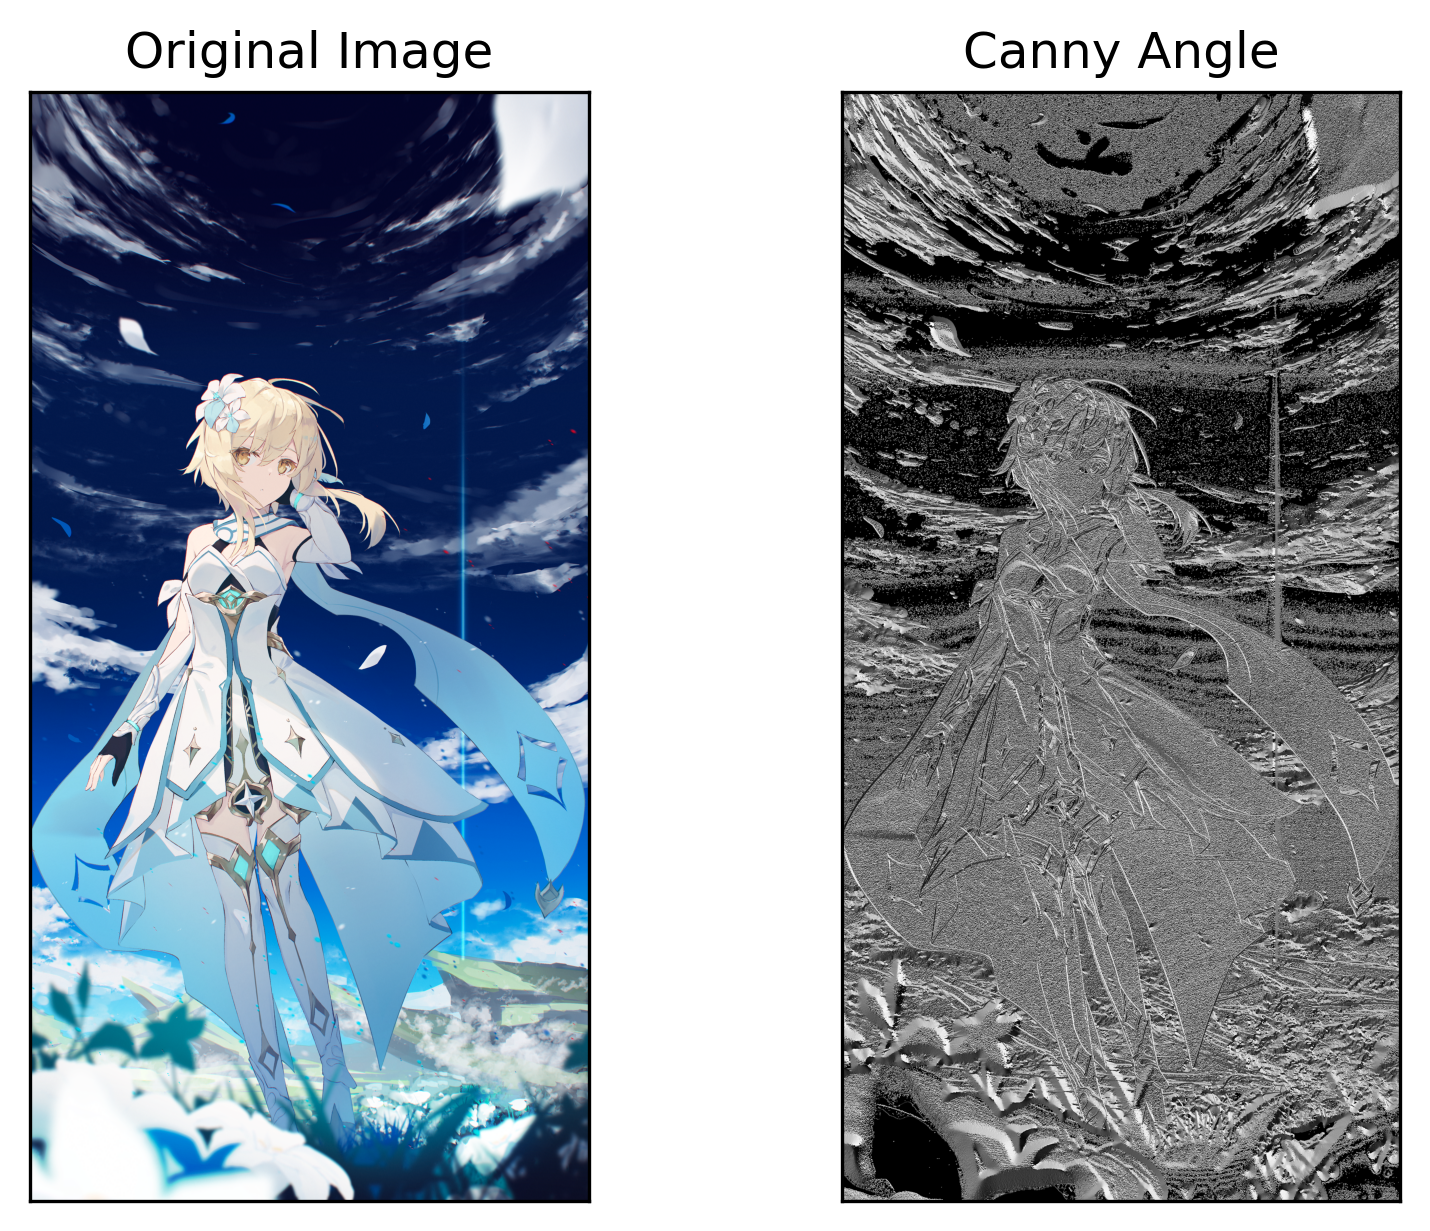

In [17]:
# 计算梯度幅值和角度
magnitude, angle = cv2.cartToPolar(gradient_x, gradient_y)

print(np.max(magnitude))

plt.figure(dpi = 300)
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(angle, cmap='gray')
plt.title('Canny Angle'), plt.xticks([]), plt.yticks([])

plt.show()

In [18]:
final_img = ed.nms(magnitude, angle)

plt.figure(dpi = 300)
plt.subplot(121), plt.imshow(cv_image, cmap = "gray")
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(final_img, cmap='gray')
plt.title('My Edge'), plt.xticks([]), plt.yticks([])

plt.show()

AttributeError: module 'edge_detection' has no attribute 'nms'

In [ ]:
angle_quantized = np.round(angle_image / (np.pi/4)) % 4
aq = np.round(angle / (np.pi/4)) % 4
print(angle_quantized)
print(aq)